### Online Vehicle Booking Market Segmentation

In [2]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\pksju\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\pksju\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\pksju\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\pksju\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\pksju\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\pksju\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [3]:
df = pd.read_csv('sigma_cabs.csv')
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [4]:
df.shape

(131662, 14)

#### Data Cleaning


In [5]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [6]:
## checking all the categories 
df['Type_of_Cab'].value_counts()

Type_of_Cab
B    31136
C    28122
A    21569
D    18991
E    11634
Name: count, dtype: int64

In [7]:
df['Confidence_Life_Style_Index'].value_counts()

Confidence_Life_Style_Index
B    40355
C    35967
A    35147
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      93900
Female    37762
Name: count, dtype: int64

In [9]:
df.describe(exclude='O')

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [10]:
## checking missing values of all the features with nan
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]

In [11]:
df[features_with_na].dtypes

Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Var1                           float64
dtype: object

In [12]:
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Type_of_Cab 15.34991 % missing values
Customer_Since_Months 4.49636 % missing values
Life_Style_Index 15.337 % missing values
Confidence_Life_Style_Index 15.337 % missing values
Var1 53.94875 % missing values


In [13]:
## statistics on numerical features
df[features_with_na].select_dtypes(exclude='O').describe()

,Customer_Since_Months,Life_Style_Index,Var1
count,125742.000000,111469.000000,60632.000000
mean,6.016661,2.802064,64.202698
std,3.626887,0.225796,21.820447
min,0.000000,1.596380,30.000000
25%,3.000000,2.654730,46.000000
50%,6.000000,2.798050,61.000000
75%,10.000000,2.946780,80.000000
max,10.000000,4.875110,210.000000


#### Imputing Null Values 

In [14]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [15]:
df[features_with_na].dtypes

Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Var1                           float64
dtype: object

#### Customer_Since_Months

In [16]:
df.Customer_Since_Months.describe()

count    125742.000000
mean          6.016661
std           3.626887
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Customer_Since_Months, dtype: float64

In [17]:
df.Customer_Since_Months.isnull().sum()

np.int64(5920)

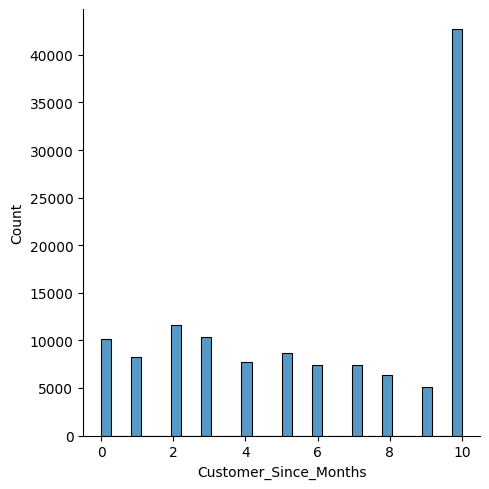

In [18]:
sns.displot(df.Customer_Since_Months, kde=False)
plt.show()

<Axes: ylabel='Customer_Since_Months'>

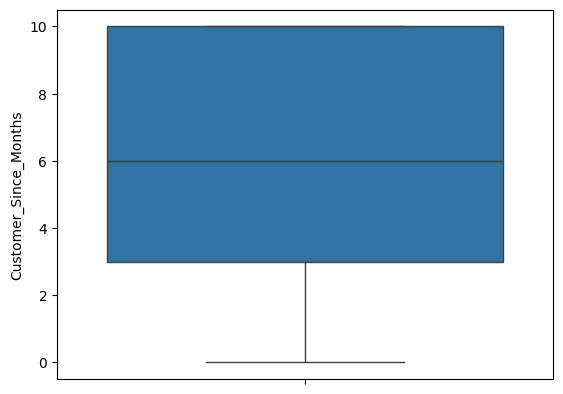

In [19]:
sns.boxplot(df.Customer_Since_Months) ## no outliers are present

In [20]:
print(df.Customer_Since_Months.mean())
print(df.Customer_Since_Months.median())
print(df.Customer_Since_Months.mode()[0])

6.016661099712109
6.0
10.0


In [21]:
# filling the missing values with median

df.Customer_Since_Months = df.Customer_Since_Months.fillna(df.Customer_Since_Months.median())

#### Life_Style_Index

In [22]:
df.Life_Style_Index.describe()

count    111469.000000
mean          2.802064
std           0.225796
min           1.596380
25%           2.654730
50%           2.798050
75%           2.946780
max           4.875110
Name: Life_Style_Index, dtype: float64

In [23]:
df.Life_Style_Index.isnull().sum()

np.int64(20193)

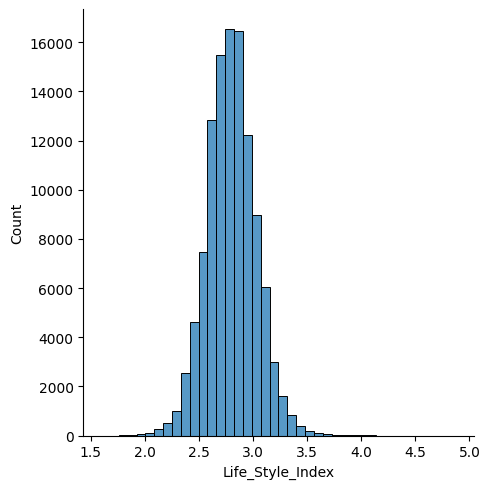

In [24]:
sns.displot(df.Life_Style_Index, kde=False, bins=40)

<Axes: ylabel='Life_Style_Index'>

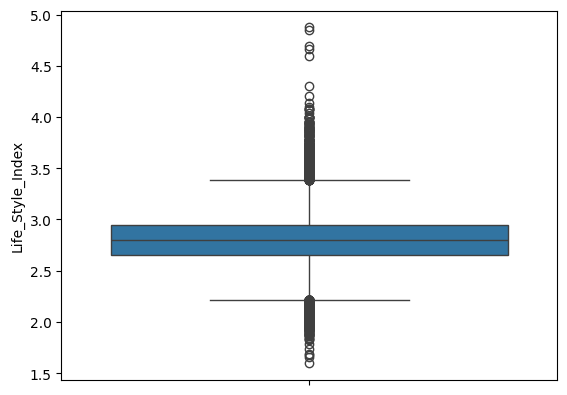

In [25]:
sns.boxplot(df.Life_Style_Index)

In [26]:
df.Life_Style_Index.describe(percentiles=[0.05, .25, .50, .75, .90, .95, .99])

count    111469.000000
mean          2.802064
std           0.225796
min           1.596380
5%            2.445944
25%           2.654730
50%           2.798050
75%           2.946780
90%           3.080032
95%           3.174166
99%           3.381022
max           4.875110
Name: Life_Style_Index, dtype: float64

In [27]:
df.Life_Style_Index.quantile([0.05, .25, .50, .75, .90, .95, .99])

0.05    2.445944
0.25    2.654730
0.50    2.798050
0.75    2.946780
0.90    3.080032
0.95    3.174166
0.99    3.381022
Name: Life_Style_Index, dtype: float64

In [28]:
# upper fence limit (uf)
uf = 2.946 + 1.5*(2.946-2.654)
uf

3.3840000000000003

In [29]:
# lower fence limit (lf)
lf = 2.654 - 1.5*(2.946-2.654)
lf

2.2159999999999993

In [30]:
df.Life_Style_Index.describe()

count    111469.000000
mean          2.802064
std           0.225796
min           1.596380
25%           2.654730
50%           2.798050
75%           2.946780
max           4.875110
Name: Life_Style_Index, dtype: float64

In [31]:
df.Life_Style_Index.fillna(df.Life_Style_Index.median(), inplace=True)

#### Var 1

In [32]:
df.Var1.isnull().sum()

np.int64(71030)

<Axes: xlabel='Var1'>

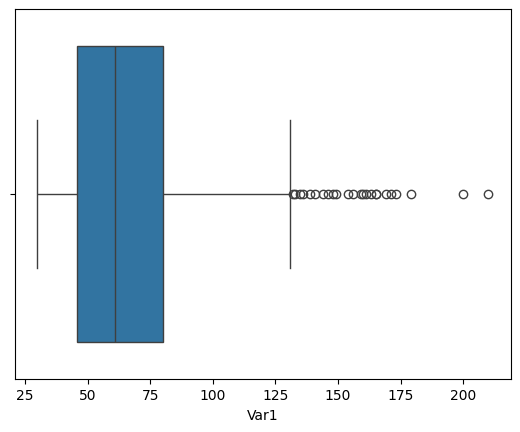

In [33]:
sns.boxplot(x = df.Var1)

In [34]:
df.Var1.describe()

count    60632.000000
mean        64.202698
std         21.820447
min         30.000000
25%         46.000000
50%         61.000000
75%         80.000000
max        210.000000
Name: Var1, dtype: float64

In [35]:
df.Var1.fillna(df.Var1.median(), inplace=True)

In [36]:
df.Type_of_Cab.isnull().sum()

np.int64(20210)

In [37]:
df.Type_of_Cab.value_counts()

Type_of_Cab
B    31136
C    28122
A    21569
D    18991
E    11634
Name: count, dtype: int64

In [38]:
# Replacing NaN with B (most frequent)
df.Type_of_Cab = df.Type_of_Cab.fillna('B')

#### Confidence_Life_Style_Index

In [39]:
# checking dtype
df.Confidence_Life_Style_Index.dtype

dtype('O')

In [40]:
# checking value counts
df.Confidence_Life_Style_Index.value_counts()

Confidence_Life_Style_Index
B    40355
C    35967
A    35147
Name: count, dtype: int64

In [41]:
# checking mode
df.Confidence_Life_Style_Index.mode()[0]

'B'

In [42]:
# imputing missing values with most frequent value i.e. 'B'
df.Confidence_Life_Style_Index = df.Confidence_Life_Style_Index.fillna('B')

In [43]:
df.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [44]:
# Dropping Trip_ID column
df.drop('Trip_ID', inplace=True, axis=1)

In [45]:
# creating categorical and numerical col

cat_col = []
num_col = []

for i in df.columns:
    if (df[i].dtypes == 'object'):
        cat_col.append(i)
    else:
        num_col.append(i)

In [46]:
cat_col

['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

In [47]:
num_col

['Trip_Distance',
 'Customer_Since_Months',
 'Life_Style_Index',
 'Customer_Rating',
 'Cancellation_Last_1Month',
 'Var1',
 'Var2',
 'Var3',
 'Surge_Pricing_Type']

#### Data Visualization

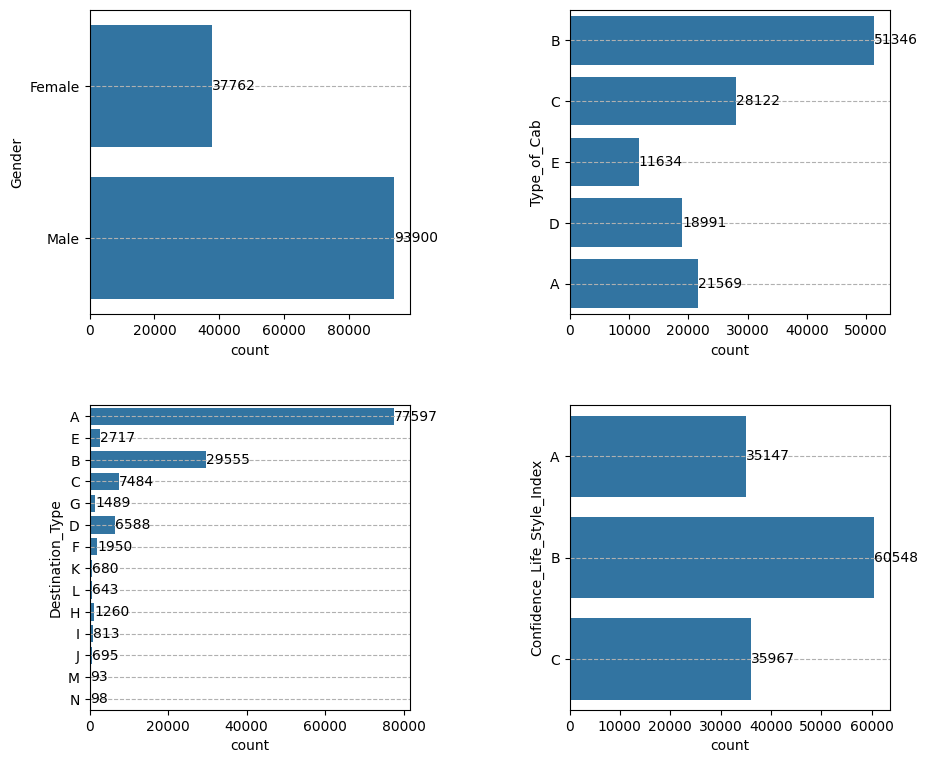

In [48]:
# plotting for different categorical features 

plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
ax = sns.countplot(df.Gender)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(2,2,2)
ax = sns.countplot(df.Type_of_Cab)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(2,2,3)
ax = sns.countplot(df.Destination_Type)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(2,2,4)
ax = sns.countplot(df.Confidence_Life_Style_Index)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplots_adjust(left=0.2, bottom=0.2, right=1, top=0.9, wspace=0.5, hspace=0.3)
plt.show()


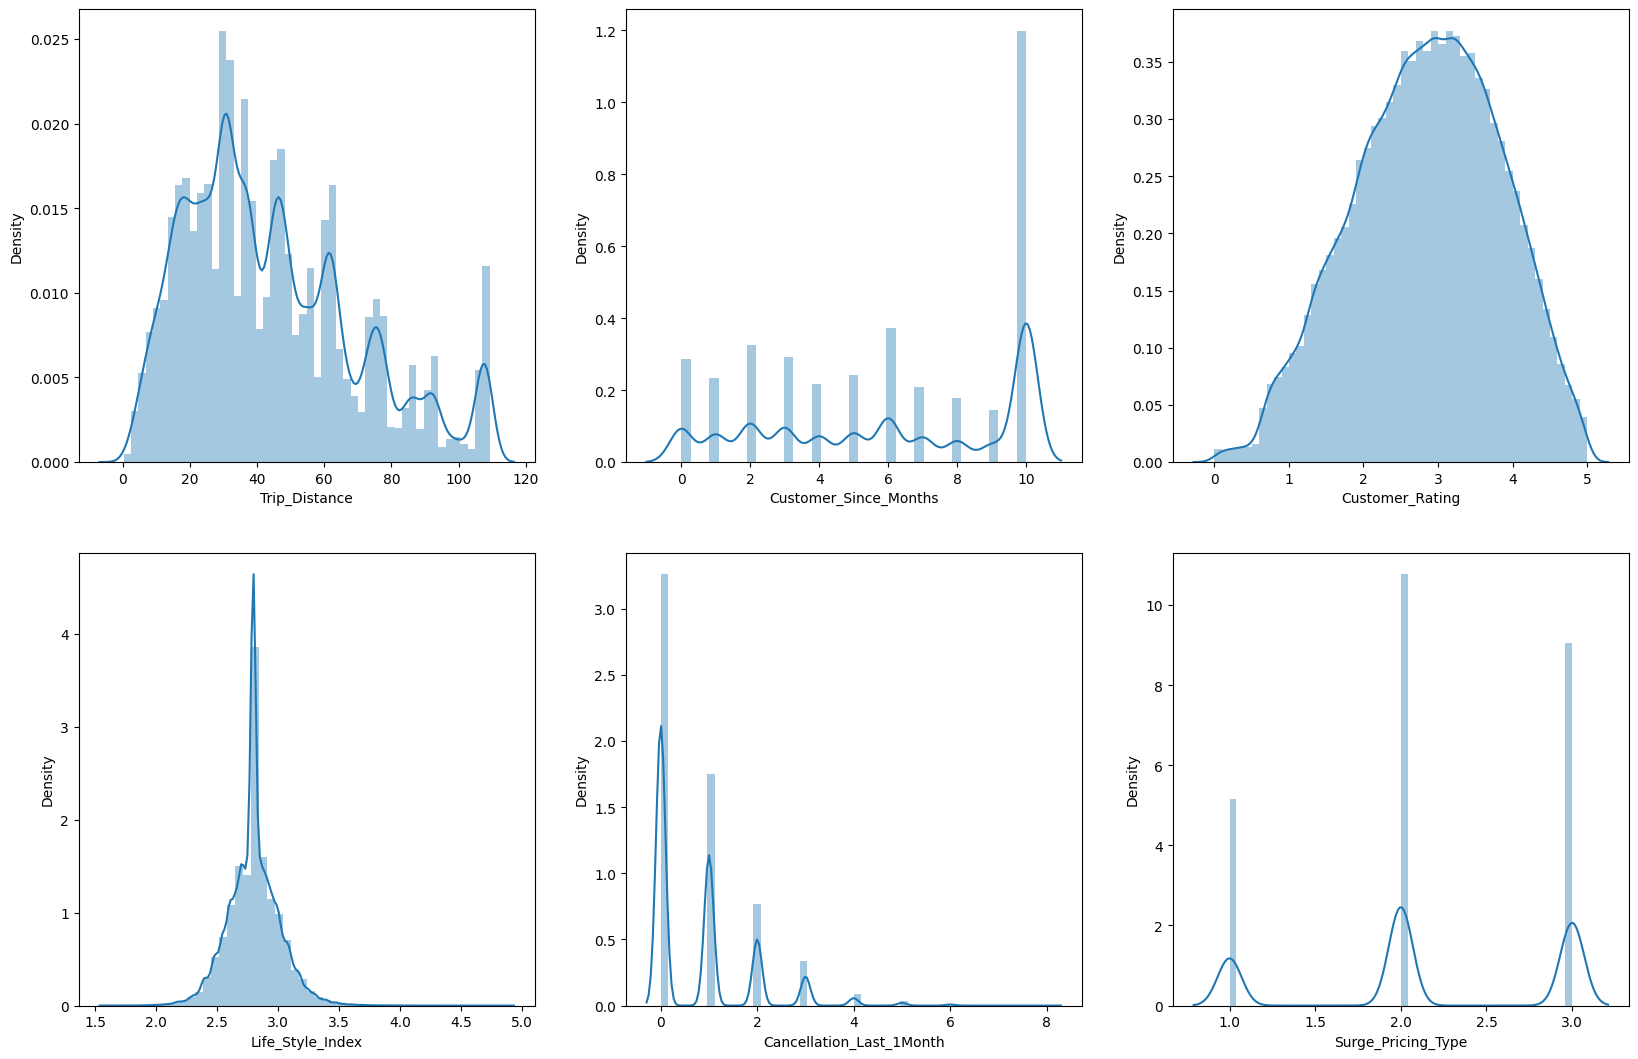

In [49]:
# plotting for numerical features

plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
ax = sns.distplot(df.Trip_Distance)

plt.subplot(3,3,2)
ax = sns.distplot(df.Customer_Since_Months)

plt.subplot(3,3,3)
ax = sns.distplot(df.Customer_Rating)

plt.subplot(3,3,4)
ax = sns.distplot(df.Life_Style_Index)

plt.subplot(3,3,5)
ax = sns.distplot(df.Cancellation_Last_1Month)

plt.subplot(3,3,6)
ax = sns.distplot(df.Surge_Pricing_Type)

plt.show()

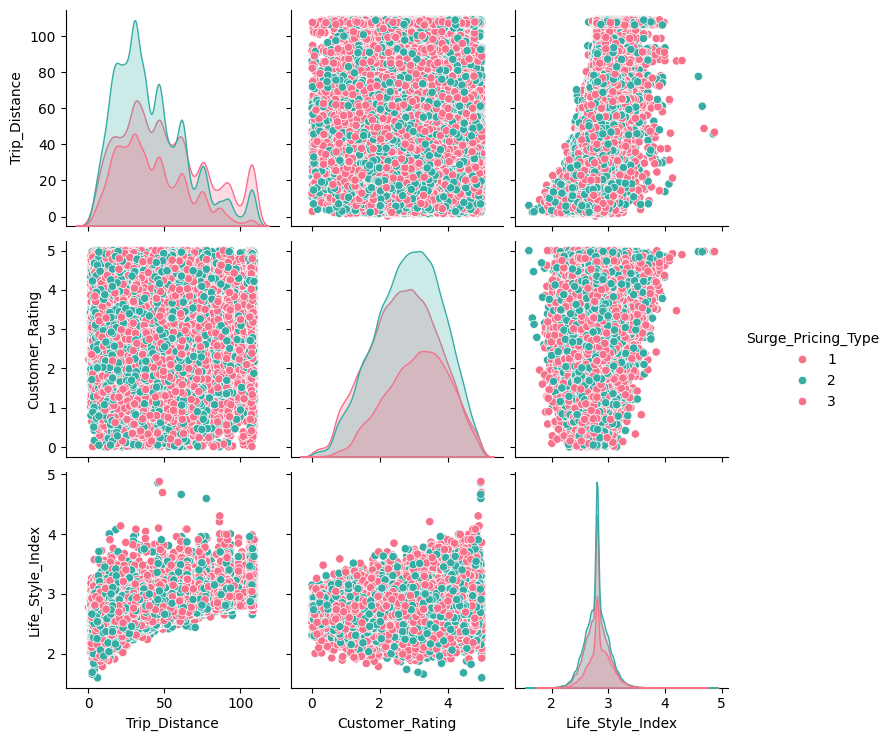

In [51]:
pairplot = sns.pairplot(
    df,
    vars=['Trip_Distance', 'Customer_Rating', 'Life_Style_Index'], 
    hue='Surge_Pricing_Type',  
    palette='husl',
    diag_kind='kde'
)

plt.show()

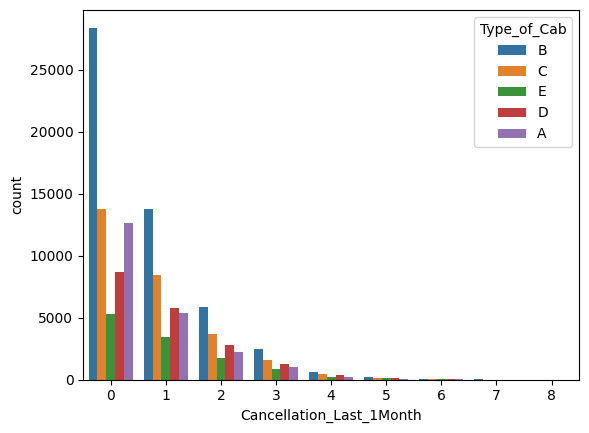

In [51]:
ax = sns.countplot(x='Cancellation_Last_1Month', hue='Type_of_Cab', data=df)
plt.show()


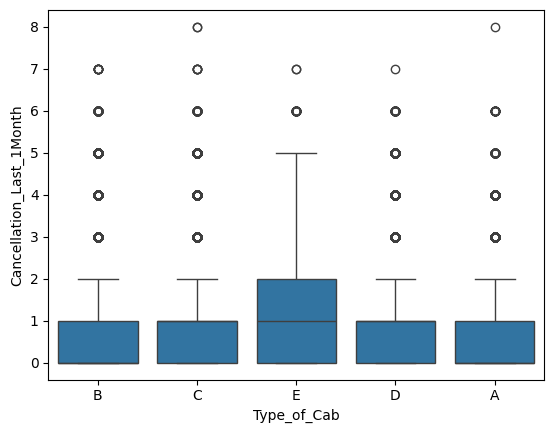

In [52]:
# plotting Cancellation_Last_1Month with Type of cab
ax = sns.boxplot(y = df.Cancellation_Last_1Month, x = df.Type_of_Cab )

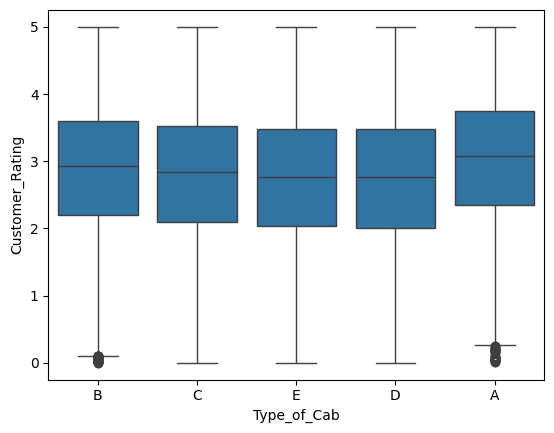

In [53]:
# plotting customer rating with type of cab
ax = sns.boxplot(y = df.Customer_Rating, x = df.Type_of_Cab )

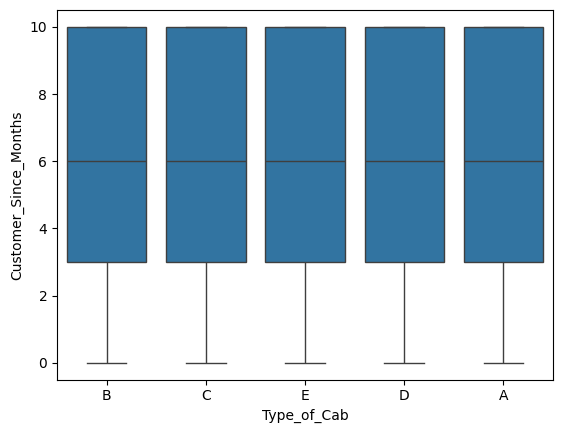

In [54]:
# plotting Customer_Since_Months with Type of cab

ax = sns.boxplot(y = df.Customer_Since_Months, x = df.Type_of_Cab)

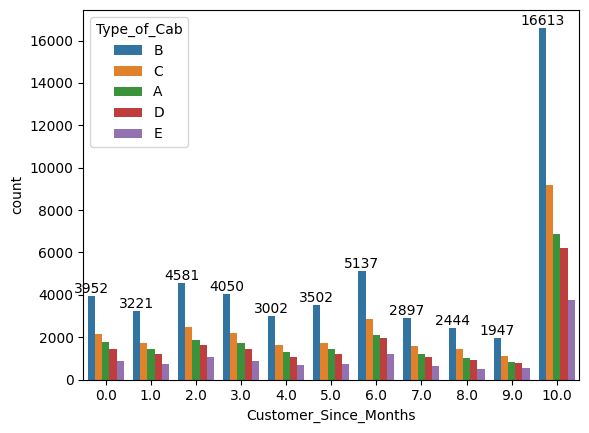

In [55]:
ax = sns.countplot(x='Customer_Since_Months', hue='Type_of_Cab', data=df)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()


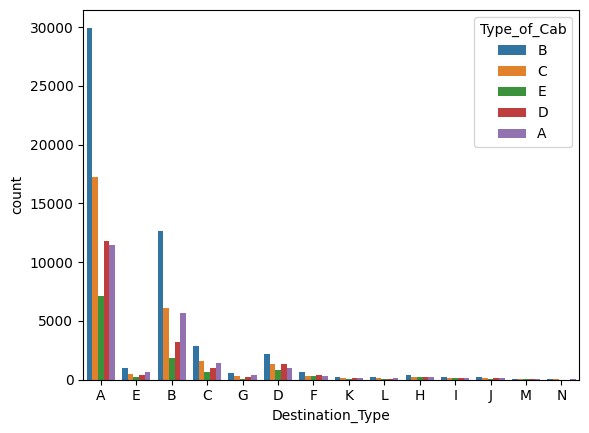

In [56]:
ax = sns.countplot(x='Destination_Type', hue='Type_of_Cab', data=df)
plt.show()


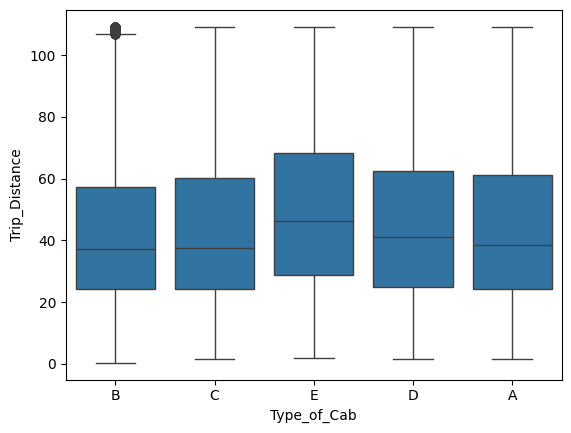

In [57]:
# ploting b/w Trip distance and type of cab

ax = sns.boxplot(y = df.Trip_Distance, x = df.Type_of_Cab)

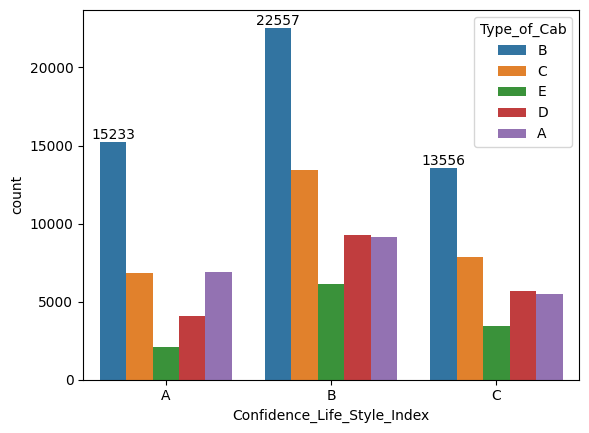

In [58]:
# ploting b/w Confidence_Life_Style_Index and Type_of_Cab

ax = sns.countplot(x='Confidence_Life_Style_Index', hue='Type_of_Cab', data=df)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

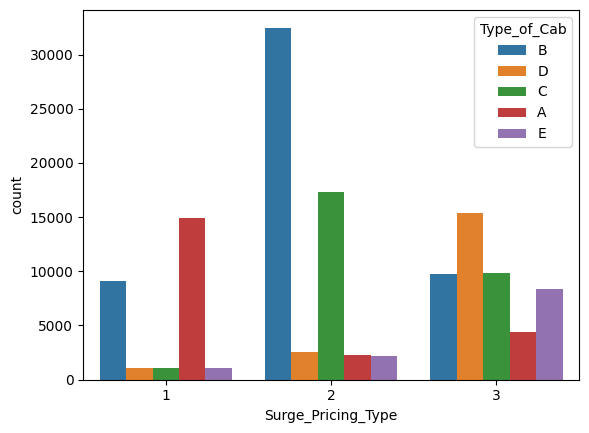

In [59]:
# ploting b/w Surge Pricing type and Type of cab

ax = sns.countplot(x='Surge_Pricing_Type', hue='Type_of_Cab', data=df)

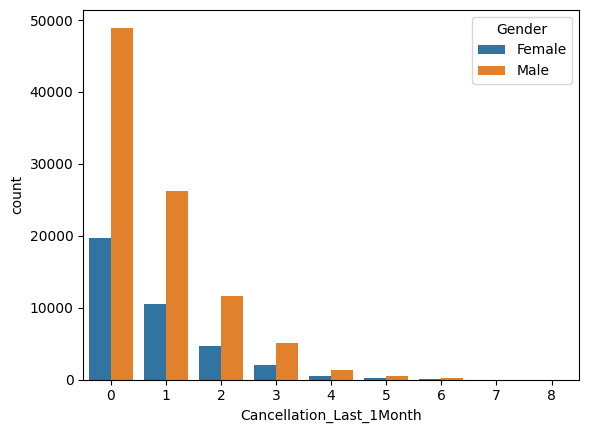

In [60]:
# checking cancellations_last_months w.r.t Gender
ax = sns.countplot(x='Cancellation_Last_1Month', hue='Gender', data=df)

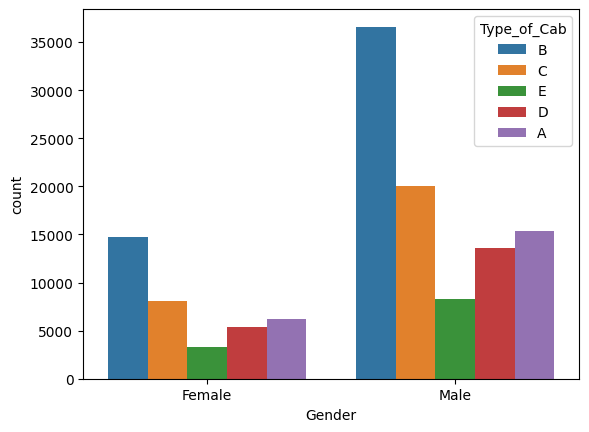

In [61]:
# plotting Gender and Type of cab preference

ax = sns.countplot(x='Gender', hue='Type_of_Cab', data=df)

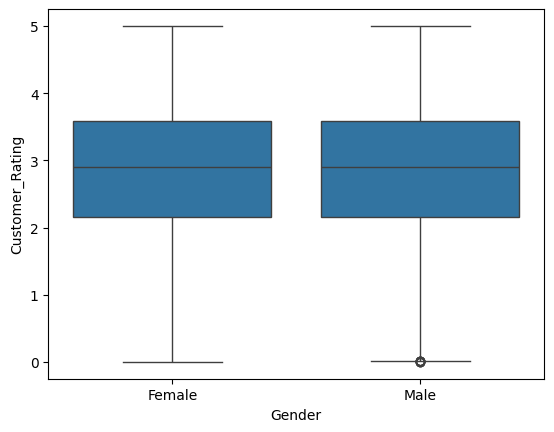

In [62]:
# ploting Customer rating Vs Gender

ax = sns.boxplot(y = df.Customer_Rating, x = df.Gender)

<Axes: xlabel='Customer_Since_Months', ylabel='Cancellation_Last_1Month'>

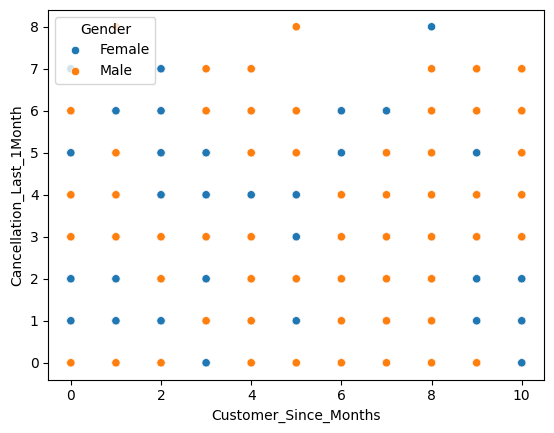

In [63]:
# plotting Customer_Since_Months Vs Cancellation_Last_1Month with Gender

sns.scatterplot(x='Customer_Since_Months', y='Cancellation_Last_1Month', hue='Gender', data=df)

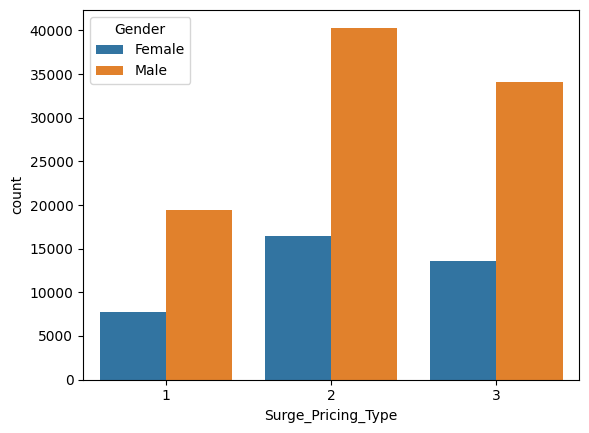

In [64]:
# ploting Surge_Pricing_Type Vs Gender

ax = sns.countplot(x='Surge_Pricing_Type', hue='Gender', data=df)

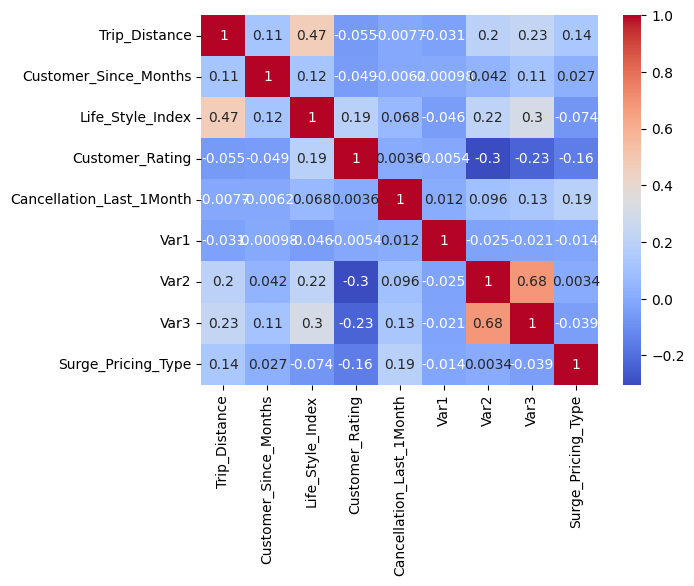

In [65]:
# checking correlation b/w columns
numeric_df = df.select_dtypes(include=['number'])
# Plotting the heatmap
ax = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')


In [97]:
df.corr()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_Distance,1.000000,0.067647,0.114413,0.468332,0.224798,-0.171064,-0.054654,-0.007686,-0.031388,0.200456,0.231706,0.002173,0.135928
Type_of_Cab,0.067647,1.000000,0.009614,-0.045720,0.080250,0.003836,-0.091945,0.092795,-0.006637,-0.001347,-0.022756,0.001103,0.503093
Customer_Since_Months,0.114413,0.009614,1.000000,0.119279,0.035757,-0.054824,-0.048969,-0.006180,-0.000977,0.041814,0.110851,0.001326,0.027194
Life_Style_Index,0.468332,-0.045720,0.119279,1.000000,0.119511,-0.022673,0.189165,0.068188,-0.045710,0.215944,0.303324,0.000626,-0.073692
Confidence_Life_Style_Index,0.224798,0.080250,0.035757,0.119511,1.000000,-0.039013,-0.061443,0.028031,-0.002668,0.044439,0.055519,0.005123,0.115344
Destination_Type,-0.171064,0.003836,-0.054824,-0.022673,-0.039013,1.000000,0.133342,0.047085,0.000896,-0.093573,-0.079056,-0.003070,0.012152
Customer_Rating,-0.054654,-0.091945,-0.048969,0.189165,-0.061443,0.133342,1.000000,0.003595,-0.005398,-0.302968,-0.227531,0.000468,-0.155279
Cancellation_Last_1Month,-0.007686,0.092795,-0.006180,0.068188,0.028031,0.047085,0.003595,1.000000,0.011711,0.095830,0.128686,0.002307,0.185646
Var1,-0.031388,-0.006637,-0.000977,-0.045710,-0.002668,0.000896,-0.005398,0.011711,1.000000,-0.025133,-0.020892,0.000619,-0.013754
Var2,0.200456,-0.001347,0.041814,0.215944,0.044439,-0.093573,-0.302968,0.095830,-0.025133,1.000000,0.683437,0.003183,0.003437


#### Data Preprocessing

In [66]:
df.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [67]:
columns = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
           'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3', 'Surge_Pricing_Type']

In [68]:
# StandardScaler for continous columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df[columns])

df.head(7)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,41.58,B,10.0,2.79805,B,E,3.50125,2,61.0,56,77,Male,2
3,61.56,C,10.0,2.79805,B,A,3.45375,0,61.0,52,74,Male,3
4,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
5,19.06,E,10.0,2.79805,B,A,2.59750,1,72.0,63,91,Male,3
6,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2


In [69]:
from sklearn.cluster import KMeans

In [70]:
# LabelEncoding for Categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Type_of_Cab"]=le.fit_transform(df["Type_of_Cab"])
df["Confidence_Life_Style_Index"] =le.fit_transform(df["Confidence_Life_Style_Index"])
df["Destination_Type"]=le.fit_transform(df["Destination_Type"])
df["Gender"]=le.fit_transform(df["Gender"])

In [71]:
df.head(7)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1,1.0,2.42769,0,0,3.90500,0,40.0,46,60,0,2
1,29.47,1,10.0,2.78245,1,0,3.45000,0,38.0,56,78,1,2
2,41.58,1,10.0,2.79805,1,4,3.50125,2,61.0,56,77,1,2
3,61.56,2,10.0,2.79805,1,0,3.45375,0,61.0,52,74,1,3
4,54.95,2,10.0,3.03453,1,0,3.40250,4,51.0,49,102,1,2
5,19.06,4,10.0,2.79805,1,0,2.59750,1,72.0,63,91,1,3
6,29.72,4,10.0,2.83958,2,1,2.97500,1,83.0,50,75,1,2


In [72]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

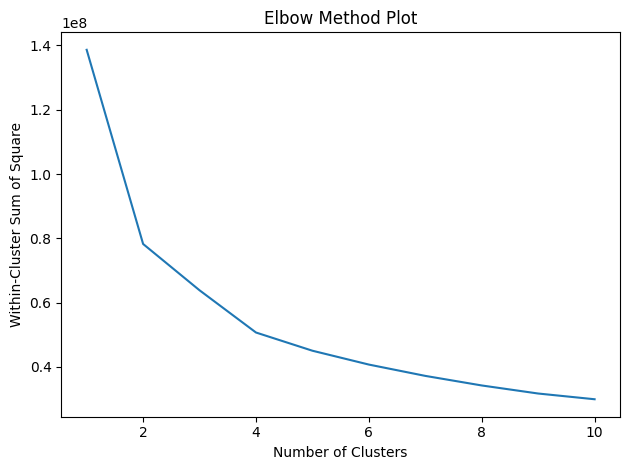

In [73]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [74]:
#Forming clusters on various parameters using Kmeans : [groups customers with similar behaviour in one cluster]

c1 = df[['Trip_Distance', 'Life_Style_Index']]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(c1)
model.labels_

array([0, 0, 2, ..., 2, 2, 0], dtype=int32)

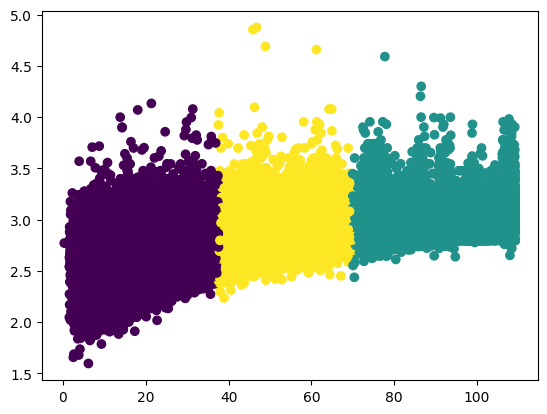

In [75]:
# making scatter plot b/w Trip_distance and Life_Style_Index
plt.scatter(c1.Trip_Distance, c1.Life_Style_Index, c=model.labels_)
plt.show()

In [76]:
c1 = df[["Trip_Distance","Life_Style_Index"]][0:50]

In [77]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(c1)
model.labels_

array([1, 3, 3, 2, 2, 1, 3, 1, 0, 0, 2, 0, 3, 3, 0, 1, 2, 1, 1, 0, 2, 3,
       1, 1, 3, 1, 2, 1, 3, 1, 2, 2, 1, 2, 3, 3, 1, 0, 1, 2, 2, 0, 3, 3,
       0, 0, 3, 3, 1, 1])

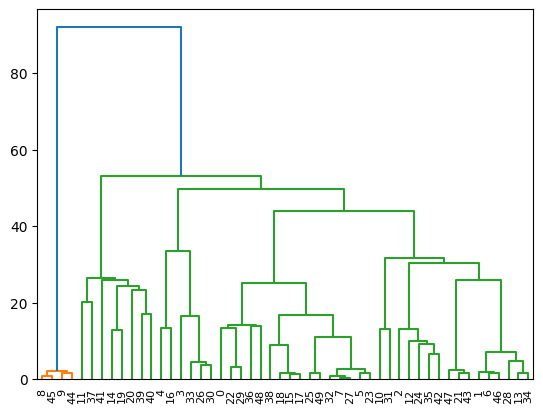

In [78]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(c1.values, c1.values))
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(DM))
plt.show()

In [79]:
c2 = df[['Trip_Distance', 'Customer_Rating']]

In [80]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(c2)
model.labels_

array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

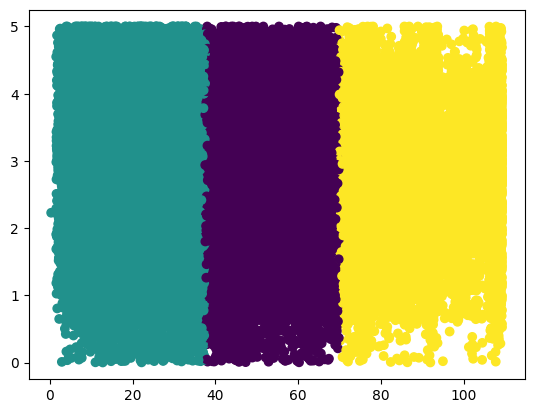

In [81]:
# scatter plot b/w Trip distance and Customer rating
plt.scatter(c2.Trip_Distance, c2.Customer_Rating, c=model.labels_)
plt.show()

In [82]:
c2 = df[["Trip_Distance","Customer_Rating"]][0:50]

In [83]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(c2)
model.labels_

array([1, 3, 3, 2, 2, 1, 3, 1, 0, 0, 2, 0, 3, 3, 0, 1, 2, 1, 1, 0, 2, 3,
       1, 1, 3, 1, 2, 1, 3, 1, 2, 2, 1, 2, 3, 3, 1, 0, 1, 2, 2, 0, 3, 3,
       0, 0, 3, 3, 1, 1])

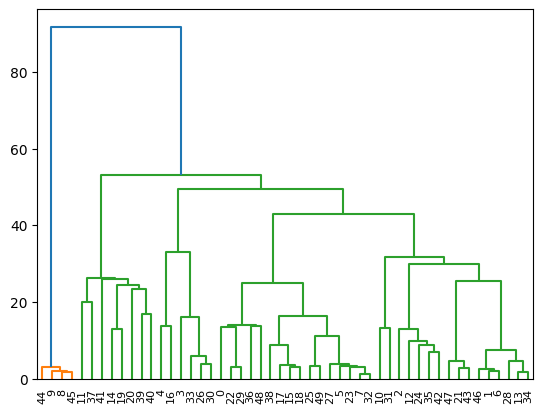

In [84]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(c2.values, c2.values))
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(DM))
plt.show()

In [85]:
c3 = df[["Life_Style_Index","Customer_Rating"]]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(c3)
model.labels_

array([1, 2, 2, ..., 2, 1, 0], dtype=int32)

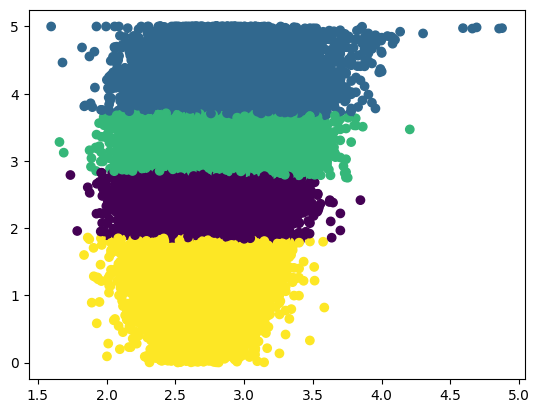

In [86]:
# scatter plot b/w Life_Style_Index and Customer rating
plt.scatter(c3.Life_Style_Index, c3.Customer_Rating, c=model.labels_)
plt.show()

In [87]:
c3 = df[["Life_Style_Index","Customer_Rating"]][0:50]
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(c3)
model.labels_

array([2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 3, 2, 1, 0, 1, 2,
       1, 2, 0, 3, 1, 3, 0, 1, 3, 2, 0, 0, 1, 1, 1, 0, 0, 1, 3, 0, 0, 0,
       3, 1, 2, 3, 1, 0])

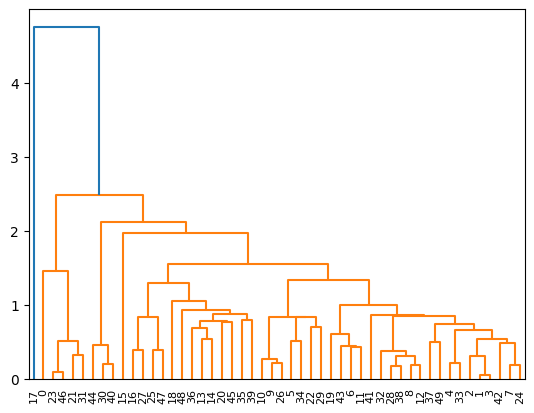

In [88]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(c3.values,c3.values))
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(DM))
plt.show()